# Hurricane Landing Distribution

In [2]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults
from sithom.xr import plot_units
from src.constants import IBTRACS_NC, LANDING_DS
from src.data_loading.ibtracs import gom_tcs

plot_defaults()

In [8]:
ds = xr.open_dataset(LANDING_DS)
ds

<xarray.Dataset>
Dimensions:      (date_time: 379, quadrant: 4)
Coordinates:
    time         (date_time) datetime64[ns] ...
    lat          (date_time) float32 ...
    lon          (date_time) float32 ...
Dimensions without coordinates: date_time, quadrant
Data variables: (12/16)
    nature       (date_time) |S2 ...
    basin        (date_time) |S2 ...
    subbasin     (date_time) |S2 ...
    name         (date_time) |S128 ...
    storm_speed  (date_time) float32 ...
    storm_dir    (date_time) float32 ...
    ...           ...
    usa_poci     (date_time) float32 ...
    usa_lat      (date_time) float32 ...
    usa_r34      (date_time, quadrant) float32 ...
    usa_r50      (date_time, quadrant) float32 ...
    usa_r64      (date_time, quadrant) float32 ...
    usa_record   (date_time) |S1 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

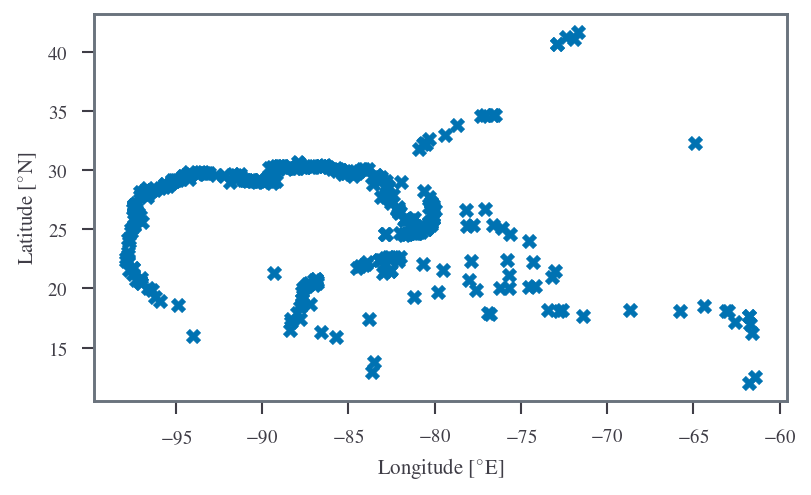

In [32]:
plot_defaults()
plt.scatter(ds.lon.values, ds.lat.values)
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [28]:
truth_array = ds.subbasin.values == b"GM"
sel_ds = ds.isel(date_time=truth_array)

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

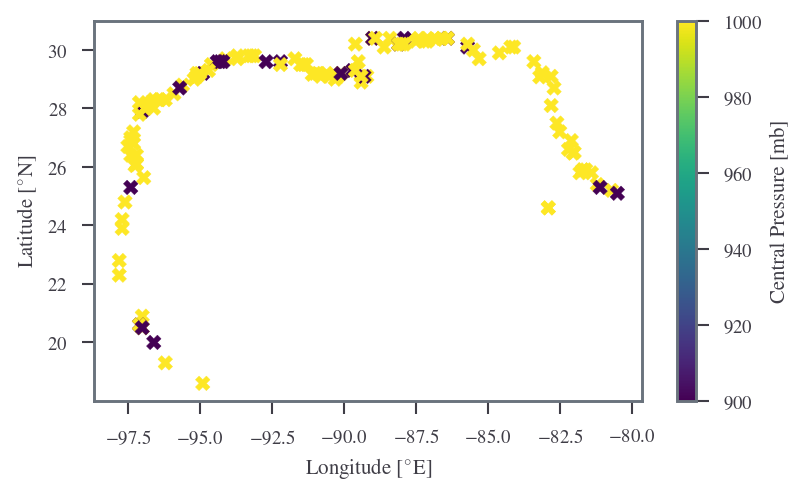

In [42]:
plot_defaults()
from src.conversions import pascal_to_millibar
plt.scatter(sel_ds.lon.values, sel_ds.lat.values, c=sel_ds.usa_pres.values, vmin=900, vmax=1000)
plt.colorbar(label="Central Pressure [mb]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [44]:
sel_ds.usa_pres

<xarray.DataArray 'usa_pres' (date_time: 192)>
array([ 32464.,  30964.,     nan,     nan,  30564.,     nan, -32372.,     nan,
        30864.,  29064.,  27864.,     nan,  32364.,  32064.,     nan,     nan,
           nan,     nan,  28664.,  32464., -32572.,  31164.,  31664.,     nan,
        29664.,     nan,     nan,  31664.,  29964.,  27564.,     nan,     nan,
           nan,     nan,     nan,     nan,  32664.,     nan,     nan,     nan,
           nan,     nan,  29464.,  31764.,     nan,     nan,  30364.,  28664.,
           nan,  31164.,     nan,     nan,     nan,  28464.,  28864.,  32564.,
        29364.,  30664.,  29464.,     nan,  27664.,  30364.,  31464.,  31464.,
           nan,  27564.,     nan,  30764., -32172., -32672., -32472., -32072.,
        28164.,  29264.,  28064., -32072.,  29364.,  32764., -32672.,  29364.,
        29064.,  29964.,  32464., -32372.,  30864.,  27164.,  29464.,  26364.,
        32664.,     nan, -32672.,  31064.,  31964.,  31964., -31772.,  30564.,
        32464.,  29564.,     nan,     nan,     nan,  26964., -32372.,  30264.,
        32764.,     nan,     nan,  31764.,  31864.,  31764.,  28364.,  31464.,
        31464.,     nan,  30964.,     nan,  31464.,  32764.,  30664.,     nan,
        31164.,  27564.,  32464., -31972.,  32364.,  31964.,  30464.,     nan,
           nan,  32264.,     nan,  30764.,  31264.,  29964.,  29964.,  32364.,
       -32472., -32372.,     nan,     nan,  31864.,  28864.,     nan,     nan,
           nan,  28564.,  28664.,  30664.,  29064., -32072.,     nan,     nan,
           nan,  32664.,  31964.,     nan,  30464., -31972.,  29064.,  28864.,
        26464.,  27264.,     nan,  28164.,  32164.,  29464., -31772.,     nan,
           nan,     nan,  27964.,  32364., -32672.,  28064.,  31864.,     nan,
       -32572.,  28464.,     nan,     nan, -31772.,  32464.,  31864., -32472.,
        31064.,  32364.,  31164.,  31164.,  29064.,  32764.,  29464.,     nan],
      dtype=float32)
Coordinates:
    time     (date_time) datetime64[ns] 1990-08-07T19:00:00.000067072 ... 190...
    lat      (date_time) float32 20.9 29.6 28.13 29.93 ... 29.8 29.2 29.3 30.1
    lon      (date_time) float32 -97.0 -83.4 -96.57 -85.67 ... -95.0 -94.7 -85.6
Dimensions without coordinates: date_time
Attributes:
    long_name:              Minimum central pressure
    units:                  Pa
    valid_min:              700
    valid_max:              1050
    coverage_content_type:  physicalMeasurement